In [127]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

### Dataset y ejemplos

In [128]:
train_data = pd.read_csv('dataset/train.csv')

In [129]:
y_train = train_data['label'].values
X_train = train_data.drop(columns=['label']).values/255

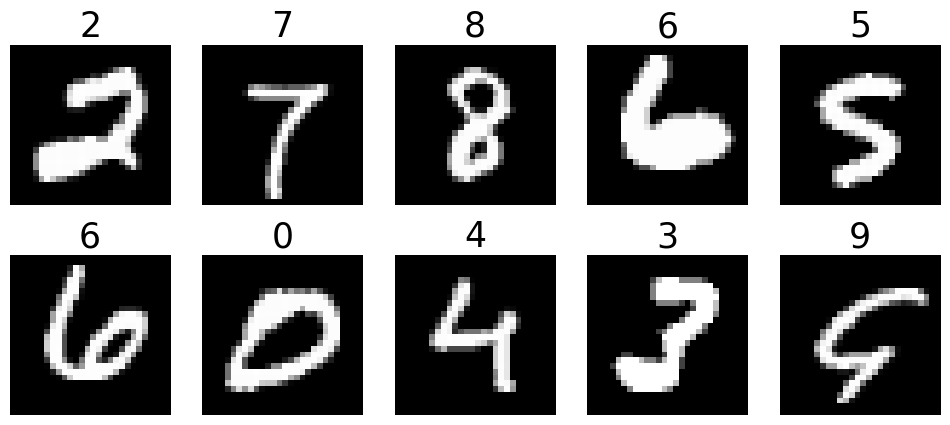

In [130]:
fig, axes = plt.subplots(2,5, figsize=(12,5))
axes = axes.flatten()
idx = np.random.randint(0,42000,size=10)
for i in range(10):
    axes[i].imshow(X_train[idx[i],:].reshape(28,28), cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(str(int(y_train[idx[i]])), color= 'black', fontsize=25)
plt.show()

In [131]:
def relu(x):
    x[x<0]=0
    return x

In [132]:
def net(X,W,b):
   
    # layer 1 = input layer
    a1 = X
    # layer 1 (input layer) -> layer 2 (hidden layer)
    z1 = np.matmul(X, W[0]) + b[0]
    # layer 2 activation
    a2 = relu(z1)
    # layer 2 (hidden layer) -> layer 3 (output layer)
    z2 = np.matmul(a2, W[1])
    s = np.exp(z2)
    total = np.sum(s, axis=1).reshape(-1,1)
    sigma = s/total
    # el output es la probabilidad para cada ejemplo
    return sigma

In [133]:
def softmax(X_in,weights):
    s = np.exp(np.matmul(X_in,weights))
    total = np.sum(s, axis=1).reshape(-1,1)
    return s / total

In [134]:
def loss(y_pred,y_true):
    global K 
    K = 10
    N = len(y_true)
    y_true_one_hot_vec = (y_true[:,np.newaxis] == np.arange(K))
    loss_sample = (np.log(y_pred) * y_true_one_hot_vec).sum(axis=1)
    return -np.mean(loss_sample)

In [135]:
def backprop(W,b,X,y,alpha=1e-4):
    K = 10
    N = X.shape[0]
    
    #forward pass
    # layer 1 = input layer
    a1 = X
    # layer 1 (input layer) -> layer 2 (hidden layer)
    z1 = np.matmul(X, W[0]) + b[0]
    # layer 2 activation
    a2 = relu(z1)
    
    # layer 2 (hidden layer) -> layer 3 (output layer)
    z2 = np.matmul(a2, W[1])
    s = np.exp(z2)
    total = np.sum(s, axis=1).reshape(-1,1)
    sigma = s/total
    
    #backpropagation
    # layer 2->layer 3 weights' derivative
    y_one_hot_vec = (y[:,np.newaxis] == np.arange(K))
    delta2 = (sigma - y_one_hot_vec)
    grad_W1 = np.matmul(a2.T, delta2)
    
    # layer 1->layer 2 weights' derivative
    delta1 = np.matmul(delta2, W[1].T)*(z1>0)
    grad_W0 = np.matmul(X.T, delta1)
    
    dW = [grad_W0/N + alpha*W[0], grad_W1/N + alpha*W[1]]
    db = [np.mean(delta1, axis=0)]
   
    return dW, db

In [136]:
eta = 5e-1
alpha = 1e-6 
gamma = 0.99 
eps = 1e-3 
num_iter = 1000 
n_H = 256 
n = X_train.shape[1]
K = 10

In [137]:
np.random.seed(1127825)
W = [1e-1*np.random.randn(n, n_H), 1e-1*np.random.randn(n_H, K)]
b = [np.random.randn(n_H)]

In [138]:
%%time
gW0 = gW1 = gb0 = 1

for i in range(num_iter):
    dW, db = backprop(W,b,X_train,y_train,alpha)
    
    gW0 = gamma*gW0 + (1-gamma)*np.sum(dW[0]**2)
    etaW0 = eta/np.sqrt(gW0 + eps)
    W[0] -= etaW0 * dW[0]
    
    gW1 = gamma*gW1 + (1-gamma)*np.sum(dW[1]**2)
    etaW1 = eta/np.sqrt(gW1 + eps)
    W[1] -= etaW1 * dW[1]
    
    gb0 = gamma*gb0 + (1-gamma)*np.sum(db[0]**2)
    etab0 = eta/np.sqrt(gb0 + eps)
    b[0] -= etab0 * db[0]
    
    if i % 500 == 0:
        # check 1
        y_pred = net(X_train,W,b)
        if i == 0:
              print("------------------------------------------------------------------------")
        print("Cross-entropy loss after", i+1, "iterations is {:.8}".format(
              loss(y_pred,y_train)))
        print("------------------------------------------------------------------------")
        print("Training accuracy after", i+1, "iterations is {:.4%}".format( 
              np.mean(np.argmax(y_pred, axis=1)== y_train)))
        print("------------------------------------------------------------------------")
        
        gW0 = gW1 = gb0 = 1

y_pred_final = net(X_train,W,b)
print("Final cross-entropy loss is {:.8}".format(loss(y_pred_final,y_train)))
print("------------------------------------------------------------------------")
print("Final training accuracy is {:.4%}".format(np.mean(np.argmax(y_pred_final, axis=1)== y_train)))
print("------------------------------------------------------------------------")

------------------------------------------------------------------------
Cross-entropy loss after 1 iterations is 7.6743264
------------------------------------------------------------------------
Training accuracy after 1 iterations is 24.9262%
------------------------------------------------------------------------
Cross-entropy loss after 501 iterations is 0.13586252
------------------------------------------------------------------------
Training accuracy after 501 iterations is 96.1429%
------------------------------------------------------------------------
Final cross-entropy loss is 0.069885227
------------------------------------------------------------------------
Final training accuracy is 97.9333%
------------------------------------------------------------------------
CPU times: user 58min 51s, sys: 6min 3s, total: 1h 4min 55s
Wall time: 8min 35s
